# INF TC1 - TD4 (2h) - Images

---

<details style="border: 1px">
<summary> RAPPELS SUR L'UTILISATION DES NOTEBOOKS</summary>

### Comment utiliser ces notebooks ?

Le but de votre travail est de répondre aux questions des exercices en **remplissant certaines cellules de ce notebook avec votre solution**. Ces cellules, une foit remplies et lancées au fur et à mesure de vos avancées, permettront de valider des tests écrits dans d'autres cellules de ce notebook. **Il est donc important de bien suivre les instructions et répondre aux questions dans l'ordre**, et ne pas changer le nom des fonctions et/ou les cellules. En particulier :
    
1) Répondez aux questions dans les cellules en dessous des questions.

2) Votre code devra remplacer le texte suivant : 

```python
# YOUR CODE HERE
raise NotImplementedError()
```

(vous pouvez effacer ces deux lignes quand vous les rencontrez mais ne modifiez pas les noms de fonctions sinon les tests ne marchent plus).

3) Exécuter enfin les cellules dans leur ordre d'apparition, de haut en bas et si votre code est correct alors les tests (sous forme d'`assert` seront validés (ils ne lanceront pas d'exception du type `AssertionError` ). Vous pouvez lancer plusieurs fois la même cellule, cela ne pose pas de soucis.
    
4) Vous pouvez créer de nouvelles cellules comme bon vous semble.

**En cas de problème, une solution est de relancer les cellules depuis le début du notebook une par une.** Pensez à bien sauvegarder ce notebook et ne pas le remplacer par un notebook qui a le même nom.
</details>

## Objectif du TD

Ce TD vous fera manipuler des images en Python, et réaliser un algorithme de remplissage basé sur le contenu. Nous verrons en particulier la structure de données matricielle et les méthodes de parcours associées. Enfin ce TD sera une préparation au TD 5 qui fera l'objet d'un rendu à réaliser à partir des concepts et du code abordés. 

IMPORTANT : Dans le cadre de ce TD, nous n'autorisons pas l'utilisation des modules [OpenCV](https://docs.opencv.org/4.x/) ou [NumPy](https://numpy.org/) (ou toute fonction de [Pillow](https://pillow.readthedocs.io/en/stable/) sauf celles indiquées).


## Exercice 1 : Charger une image et dessiner

Une image en informatique est stockée sous forme d'une matrice de pixels qui contiennent les couleurs. Le model classique de couleurs est dit "RGB" (Red, Green, Blue) [(doc)](https://fr.wikipedia.org/wiki/Rouge-vert-bleu) où chaque pixel contient une information colorimétrique encodée sous forme de triplets `(r, g, b)` (red, green, blue). Les valeurs de couleur peuvent varier de 0 à 255 pour chaque composante de couleur. Par exemple le rouge est encodé en `(255, 0, 0)`, le gris en `(128, 128, 128)`, etc. Ces couleurs sont organisées en matrice de dimension égale à celle de l'image, les couleurs sont indépendantes les unes des autres.

Dans ce TD nous allons utiliser un module Python appelé PIL (Pillow [doc](https://pillow.readthedocs.io/en/stable/)). Ce module permettra également de créer des images. Il est possible de l'initialiser comme suit pour charger une image dans une variable `px` dite d'accès de pixel `PixelAccess` [(doc)](https://pillow.readthedocs.io/en/stable/reference/PixelAccess.html). Le module Pillow est normalement installé, si ce n'est pas le cas, vous devez exécuter la commande suivante dans une fenêtre de terminal Anaconda (Menu Démarrer / Anaconda 64bit / Anaconda PowerShell Prompt) : `pip3 install Pillow`.

Pour tester sur le module est présent sur votre ordinateur, charger une image comme suit :

In [ ]:
from PIL import Image
from IPython.display import display

im = Image.open("lyon.png")
im = im.convert("RGB")  # important pour bien avoir 3 couleurs
px = im.load()         

W, H = im.size          # taille de l'image
r, g, b = px[10, 20]    # on récupère un pixel
px[10, 21] = r, g, b    # on change un pixel

im = im.resize((W//2, H//2))

display(im)             # on affiche l'image dans la cellule
# im.show()             # on affiche l'image si vous n'utilisez pas de notebook

Vous pouvez également créer une **nouvelle image** `im2` vide (noire) de taille identique à `im` :

In [ ]:
im2 = Image.new('RGB', (im.width, im.height)) 
px2 = im2.load()
display(im2)

**Question 1.1 -** Définissez une fonction de lecture qui renvoie la couleur d'un pixel à la position $(x, y)$ d'une image donnée. Inspirez vous du code précédent ou de la documentation Pillow [(doc)](https://pillow.readthedocs.io/en/stable/)).

In [ ]:
def getPixel(x: int, y: int, px) -> tuple:
    """Get the color of a pixel.
    Args:
        x (int): pixel x coordinate
        y (int): pixel y coordinate
        px (PixelAccess): image pixel access

    Returns:
        tuple: color of the pixel
    """
    ### BEGIN SOLUTION
    return px[x, y]
    ### END SOLUTION

In [ ]:
assert getPixel(0, 0, px) == (69, 119, 170) # bleu
assert getPixel(0, 0, px2) == (0, 0, 0) # noir

Afin de vérifier visuellement votre résultat, nous vous fournissons la fonction `draw_rectangle` qui permet de dessiner la couleur d'un pixel dans une cellule :

In [ ]:
from IPython.display import display, HTML

def draw_rectangle(rgb_color):
    color = f'rgb({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})'
    html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{color}" /></svg>'

    display(HTML(html))
# utilisation : draw_rectangle((69, 119, 170)) 

In [ ]:
draw_rectangle(getPixel(0, 0, px)) # bleu

In [ ]:
draw_rectangle(getPixel(0, 0, px2)) # noir

**Question 1.2 -** Définissez une fonction d'écriture d'un pixel à une position $(x, y)$ d'une image avec une couleur donnée en argument sous forme de `tuple` $(r, g, b)$.

In [ ]:
def setPixel(x: int, y:int, color: tuple, px) -> None:
    """Set the color of a pixel.
    Args:
        x (int): pixel x coordinate
        y (int): pixel y coordinate
        color (tuple): color to set
        px (PixelAccess): image pixel access
    """
    ### BEGIN SOLUTION
    px[x, y] = int(color[0]), int(color[1]), int(color[0])
    ### END SOLUTION

In [ ]:
r, g, b = (0, 0, 0)
setPixel(0, 0, (r, g, b), px2)
assert getPixel(0, 0, px2) == (r, g, b)

**Question 1.3 -** Écrire une fonction permettant de peindre un rectangle de l'image avec une même couleur. Coloriez avec la couleur moyenne de cette région (et donc définir une fonction qui calcule cette couleur `moyenne`).

In [ ]:
def moyenne(corner_x, corner_y, region_w, region_h, px) -> tuple:
    """Compute the average color of a region.
    Args:
        corner_x (int): top left corner x coordinate
        corner_y (int): top left corner y coordinate
        region_w (int): region width
        region_h (int): region height
        px (PixelAccess): image pixel access
    Returns:
        tuple: average color of the region
    """
    ### BEGIN SOLUTION
    sum_red, sum_green, sum_blue = 0,0,0
    area = region_w*region_h    
    
    for i in range(int(corner_x), int(corner_x+region_w)): 
        for j in range(int(corner_y),int(corner_y+region_h)):
            r,g,b = getPixel(i, j, px)
            sum_red += r
            sum_green += g
            sum_blue += b 

    sum_red/=area
    sum_green/=area
    sum_blue/=area

    return (sum_red,sum_green,sum_blue)
    ### END SOLUTION

Dans la fonction de dessin de région `setRegion`la variable `color` contient le triplet de couleurs à utiliser.

In [ ]:
def setRegion(x, y, w, h, color, px) -> None:
    """Set the color of a region.
    Args:
        x (int): top left corner x coordinate
        y (int): top left corner y coordinate
        w (int): region width
        h (int): region height
        color (tuple): color to set
        px (PixelAccess): image pixel access
    """
    ### BEGIN SOLUTION
    for i in range(int(x), int(x+w)):
        for j in range(int(y), int(y+h)):
            setPixel(i, j, (color[0], color[1], color[2]), px)
    ### END SOLUTION

In [ ]:
assert moyenne(0, 0, 1, 1, px2) == (0.0, 0.0, 0.0) # région noire

Le code ci-dessous doit dessiner un rectangle blanc au milieu d'une image noire.

In [ ]:
im2 = Image.new('RGB', (im.width, im.height)) 
px2 = im2.load()
W, H = im.size
setRegion(W//3, H//3, W//3, H//3, (255, 255, 255), px2)
display(im2)

Nous allons maintenant réaliser un remplissage un peu plus intéressant de l'image à partir de son contenu (dans notre cas nous nous baserons sur les couleurs contenues dans l'image).

**Question 1.4 -** Ecrire une fonction de calcul de [distance Euclidienne](https://fr.wikipedia.org/wiki/Distance_(math%C3%A9matiques)) entre deux couleurs RGB (Red, Green, Blue) $C_1$ et $C_2$ comme suit :

$d_{\text{euclidienne}} = \sqrt{(R_2 - R_1)^2 + (G_2 - G_1)^2 + (B_2 - B_1)^2}$

Attention il s'agit de distances _entre_ les couleurs à comparer et non pas la distance entre les positions des pixels. 

In [ ]:
def distance(c1: tuple, c2: tuple) -> float:
    """Compute the distance between two colors.
    Args:
        c1 (tuple): first color
        c2 (tuple): second color
    Returns:
        float: distance between the two colors
    """
    ### BEGIN SOLUTION
    return sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 + (c1[2]-c2[2])**2)
    ### END SOLUTION

In [ ]:
assert distance((0, 0, 0), (0, 0, 0)) == 0.0

**Question 1.5 -**  Nous allons désormais travailler sur une méthode de remplissage de région basée sur l'homogénéité des couleurs dans la région. Pour cela nous allons ré-utiliser les méthodes ci-dessus en particulier la distance Euclidenne, en utilisant l'algorithme dit de _flood fill_ [(doc)](https://en.wikipedia.org/wiki/Flood_fill) et qui fonctionne comme suit :

1. Charger une image et initialiser deux listes vides : une liste de pixels à visiter et une liste de pixels déjà visités
2. Définir un pixel de départ $p_{(x, y)}$ et le rajouter dans la liste de pixels à visiter
3. Extraire un pixel $p_{(i, j)}$ de la liste des pixels à visiter, il constituera la couleur $c_{(i, j)}$ de la région homogène et le rajouter dans une troisième liste de pixels homogènes à colorier avec cette couleur 
4. Tant que la liste de pixels homogènes n'est pas vide, extraire un pixel de cette liste :
    
    - Colorier le pixel avec la couleur $c_{(i, j)}$ et le rajouter dans la liste des pixels visités
    - Explorer les 4 voisins autour du pixel (haut, bas, gauche, droite) et pour chaque voisin :
        - Si la couleur du voisin est en dessous d'un seuil d'homogénéité alors l'inclure dans la liste de pixels homogènes
        - Sinon rajouter le pixel dans la liste de pixels à visiter
        - Répéter cela tant que la liste de pixels homogènes n'est pas vide

5. Répéter cela tant que la liste des pixels non visités n'est pas vide

Le résultat attendu est une image remplie coloriée avec un nombre de couleur inférieur au nombre initial de couleurs.

In [ ]:
def floodFill(w: int, h: int, start_x: int, start_y: int, seuil: int, px, px2) -> tuple:
    """Flood fill algorithm.
    Args:
        w (int): image width
        h (int): image height
        start_x (int): starting x coordinate
        start_y (int): starting y coordinate
        seuil (int): color distance threshold
        px (PixelAccess): image pixel access
        px2 (PixelAccess): image pixel access
    Returns:
        tuple: visited pixels, not visited pixels, unique colors used
    """
    ### BEGIN SOLUTION
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    visited = set()
    not_visited = {(start_x, start_y)}
    unique_colors_used = set()
    while not_visited:
        q = [not_visited.pop()]
        c = px[q[0][0], q[0][1]]
        unique_colors_used.add(c)
        while q: # liste des voisins à visiter à colorier avec c
            x, y = q.pop()
            visited.add((x, y))
            px2[x, y] = c # on colorie l'image résulat ici
            for dirx, diry in directions:
                tx, ty = x + dirx, y + diry
                if (0 <= tx < w) and (0 <= ty < h):
                    if (tx, ty) not in visited:
                        if distance(px[tx, ty], c) < seuil: 
                            q.append((tx, ty))
                        else:
                            not_visited.add((tx, ty))
    return visited, not_visited, unique_colors_used
    ### END SOLUTION

Le code ci-dessous va tester votre solution avec une image fournie et générer quelques statistiques liés au nombre de couleurs utilisées.

In [ ]:
from math import sqrt

im = Image.open("lyon.png")
im2 = Image.new('RGB', (im.width, im.height))
px = im.load()
px2 = im2.load()
W, H = im.size

print("nombre de pixels dans l'image:", W * H)

seuil = 10
start_x, start_y = 0, 0

visited, not_visited, colors = floodFill(W, H, start_x, start_y, seuil, px, px2)
print("nombre de noeuds coloriés", len(visited))
print("nombre de noeuds non visités", len(not_visited))
print(f"nombre de couleurs utilisées {len(colors)}")
display(im2)

## Pour aller plus loin

- Tester le remplissage dans 8 directions (en prenant en compte les diagonales) au moyen dans la fonction d'exploration de voisinage des pixels.

## Exercice 2 : Traitement d'image par filtre

Nous allons aborder un deuxième aspect de manipulation d'image : le traitement d'image, afin d'en extraire des informations intéressantes (contours, formes, etc.). En particulier nous allons créer différents _filtres_ dont le but sera de transformer les valeurs des pixels afin de par exemple réduire le bruit que les images peuvent contenir (à savoir les variations locales de valeur).

La plupart de ces méthodes étant couteuses en temps, nous travaillerons sur une version en niveau de gris.

**Question 2.1 -** Écrire une fonction de conversion d'image en niveaux de gris (soit la moyenne des triplets `(r,g,b)` ou en utilisant la formule suivante : 

$ C_{gray} = (0.3 \times R) + (0.59 \times G) + (0.11 \times B)$

In [ ]:
def conversion_gris(px, W: int, H: int) -> None:
    """Convert an image to grayscale.
    Args:
        px (PixelAccess): image pixel access
        W (int): image width
        H (int): image height
    """
    ### BEGIN SOLUTION
    for x in range(0, W):
        for y in range(0, H):
            m = int(0.30*px[x, y][0] + 0.59*px[x, y][1] + 0.11*px[x, y][2])
            px[x, y] = (m, m, m)
    ### END SOLUTION

In [ ]:
im = Image.open("lyon.png")
im = im.convert("RGB")
px = im.load()
W, H = im.size
conversion_gris(px, W, H)
display(im)

Nous commençon avec le filtre dit de _Flou Gaussien_, basé sur une opération dite de _convolution_, permettant d'appliquer une fonction de distribution gaussienne aux voisins d'un pixel et d'en faire la moyenne. Autrement dit il s'agira de réaliser la moyenne pondérée de chaque pixel en réalisant la moyenne du pixel et de ses voisins en utilisant par exemple la matrice ci-dessous (dont les valeurs sont définies par la distribution gaussienne donnée en annexe pour une matrice $3 \times 3$) :

$G(x) = \frac{1}{\sqrt[]{2 \pi } \sigma} e^{- \frac{x^{2}}{2 \sigma ^{2}}}$

In [ ]:
p

**Question 2.2 -**  Implémentez le filtre gaussien tel que défini ci-dessus en définissant les filtres donnés ci-dessous. La fonction doit effectuer la multiplication des pixels centrés sur le pixel en cours avec les valeurs de la matrice, puis la somme pondérée. Vous pourrez utiliser les matrices ci-dessus d'approximation du filtre (en commençant par le filtre Gaussien $3 \times 3$ dont le total des valeurs est $16$). Utilisez la version de l'image en niveaux de gris afin de simplifier les traitements.

Commencez tout d'abord par définir une fonction qui calcul la somme des valeurs d'une matrice (de type `gauss3`).

In [ ]:
def somme_matrice(m: list = []) -> float:
    """Compute the sum of all the elements in a matrix.
    Args:
        m (list): matrix
    Returns:
        float: sum of all the elements in the matrix
    """
    ### BEGIN SOLUTION
    s = 0
    for row in m:
        s += sum(row)
    return s
    ### END SOLUTION

In [348]:
assert somme_matrice(gauss3) == 16

Ecrire la fonction de convolution. Pensez à prendre en compte les bords de l'image. Conseil : ne vous approchez pas trop du bord afin de ne pas réaliser une convolution en dehors de l'image.

In [349]:
def convolution(px, W: int, H: int, m: list) -> None:
    """Apply a convolution matrix on an image.
    Args:
        px (PixelAccess): image pixel access
        W (int): image width
        H (int): image height
        m (list): convolution matrix
    """
    ### BEGIN SOLUTION
    w = len(m)
    h = len(m[0])
    wp = int((w - 1) / 2)
    hp = int((h - 1) / 2)

    for x in range(wp, W - wp):
        for y in range(hp, H - hp):
            sum = 0
            for a in range(-wp, wp + 1):
                for b in range(-hp, hp + 1):
                    sum += px[x + a, y + b][0] * m[a + wp][b + hp]
            v = int(sum / somme_matrice(m))
            px[x, y] = v, v, v
    ### END SOLUTION

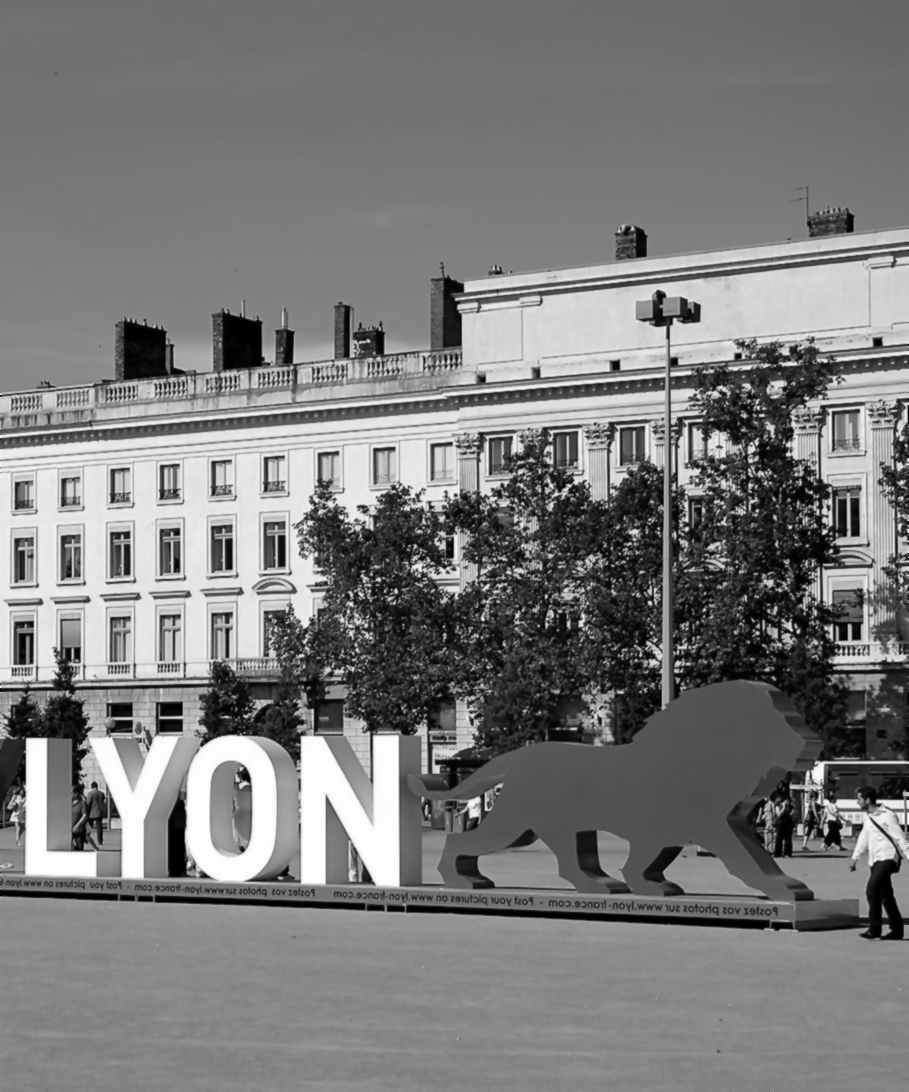

In [350]:
im = Image.open("lyon.png")
im = im.convert("RGB")
px = im.load()
W, H = im.size
conversion_gris(px, W, H)
convolution(px, W, H, gauss3)
display(im)

Vous pouvez comparer votre floutage avec celui de PIL :

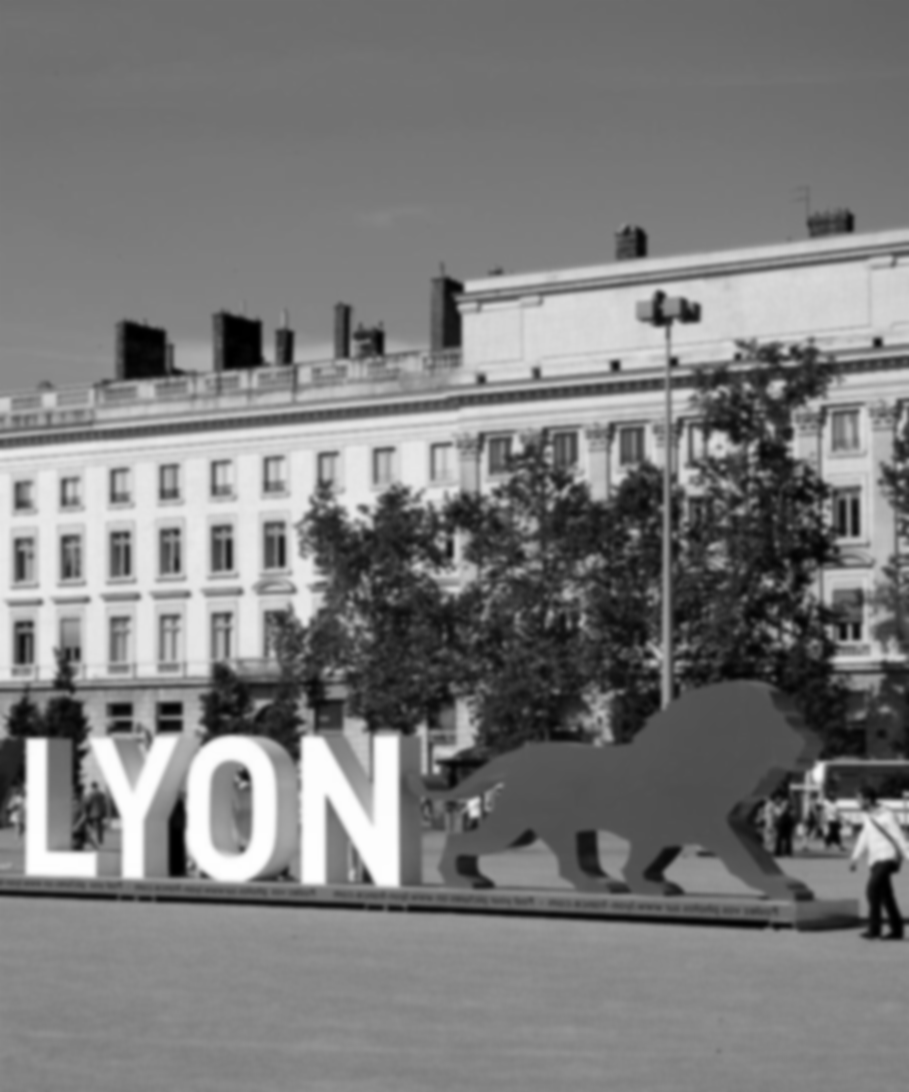

In [351]:
from PIL import Image, ImageFile, ImageDraw, ImageChops, ImageFilter
_im = im.filter(ImageFilter.GaussianBlur)
display(_im)

**Question 2.3 -** Testez votre code avec ces filtres ci-dessous avec un facteur de normalisation/pondération de 1 : que se passe-t-il ? [(doc)](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

In [352]:
sobely3 = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]

sobelx3 = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

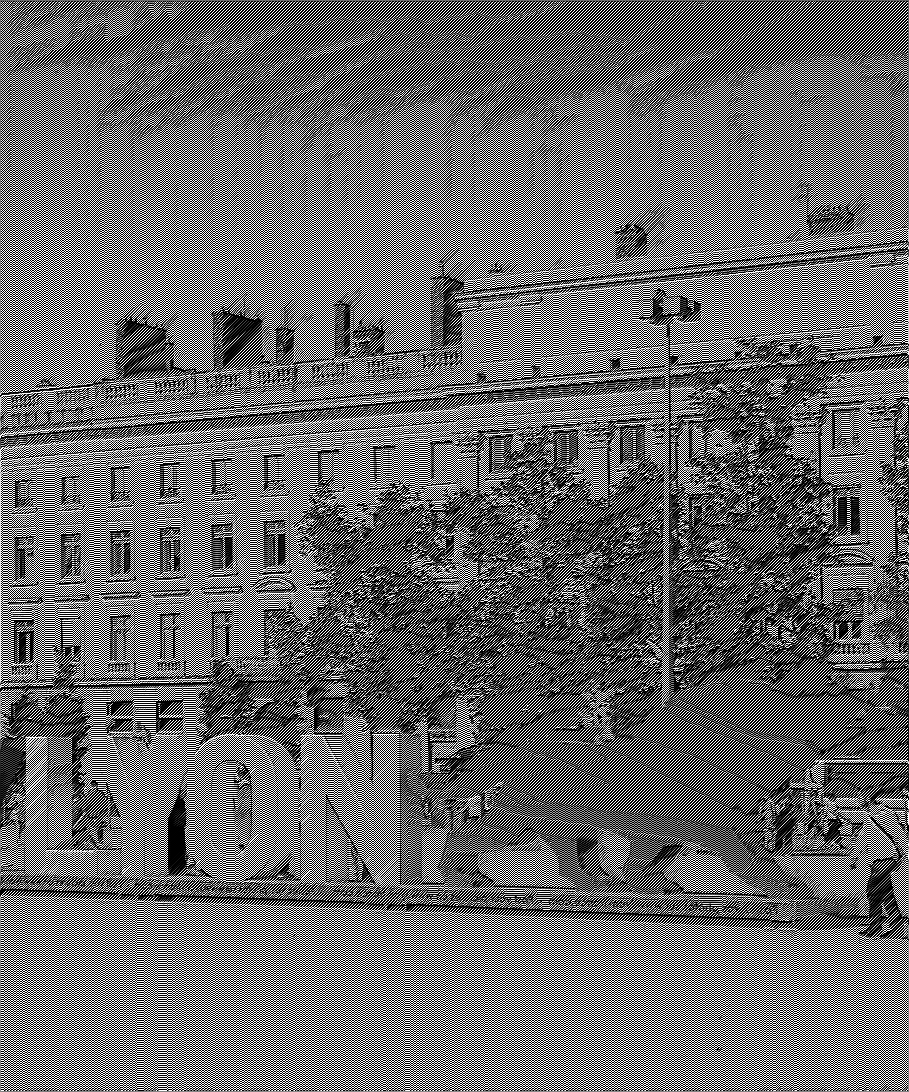

In [353]:
def convolution_sobel(px, W: int, H: int, m: list, f = 1) -> None:
    """Apply a sobel filter convolution on an image.
    Args:
        px (PixelAccess): image pixel access
        W (int): image width
        H (int): image height
        m (list): convolution matrix
        f (int): factor

    """
### BEGIN SOLUTION
    w = len(m)
    h = len(m[0])
    wp = int((w - 1) / 2)
    hp = int((h - 1) / 2)

    for x in range(wp, W - wp):
        for y in range(hp, H - hp):
            sum = 0
            for a in range(-wp, wp + 1):
                for b in range(-hp, hp + 1):
                    sum += px[x + a, y + b][0] * m[a + wp][b + hp]

            v = int(sum / f)
            px[x, y] = v, v, v

image = Image.open("lyon.png")
image = image.convert("RGB")
px = image.load()
W, H = image.size
conversion_gris(px, W, H)
convolution_sobel(px, W, H, sobely3, f=1)
display(image)

# On réalise la détection de contour de l'image dans le sens des X ou Y
# 
### END SOLUTION

## Tests pour la fonction de floodfill

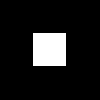

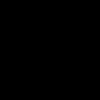

on est en dessous du seuil on garde les 2 couleurs
on part du coin en haut à gauche -> noir
nombre de noeuds coloriés 10000
nombre de noeuds non visités 0
nombre de couleurs utilisées {(0, 0, 0), (255, 255, 255)}


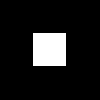

on part du milieu -> blanc
nombre de noeuds coloriés 10000
nombre de noeuds non visités 0
nombre de couleurs utilisées {(0, 0, 0), (255, 255, 255)}


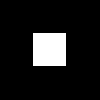

on est au dessus du seuil on ne garde qu'une couleur
on part du coin en haut à gauche -> noir
nombre de noeuds coloriés 10000
nombre de noeuds non visités 0
nombre de couleurs utilisées {(0, 0, 0)}


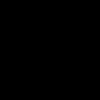

on part du milieu -> blanc
nombre de noeuds coloriés 10000
nombre de noeuds non visités 0
nombre de couleurs utilisées {(255, 255, 255)}


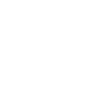

In [354]:
W, H = 100, 100
im = Image.new('RGB', (W, H)) 
px = im.load()
setRegion(W//3, H//3, W//3, H//3, (255, 255, 255), px)
display(im)

im2 = Image.new('RGB', (W, H)) 
px2 = im2.load()
display(im2)

d = distance((0, 0, 0), (255, 255, 255)) # pour trouver le seuil

print("on est en dessous du seuil on garde les 2 couleurs")
print("on part du coin en haut à gauche -> noir")
visited, not_visited, colors = floodFill(W, H, 0, 0, d - 1, px, px2)
print("nombre de noeuds coloriés", len(visited))
print("nombre de noeuds non visités", len(not_visited))
print(f"nombre de couleurs utilisées {colors}")
display(im2)

print("on part du milieu -> blanc")
visited, not_visited, colors = floodFill(W, H, W/2, H/2, d - 1, px, px2)
print("nombre de noeuds coloriés", len(visited))
print("nombre de noeuds non visités", len(not_visited))
print(f"nombre de couleurs utilisées {colors}")
display(im2)

print("on est au dessus du seuil on ne garde qu'une couleur")
print("on part du coin en haut à gauche -> noir")
visited, not_visited, colors = floodFill(W, H, 0, 0, d + 1, px, px2)
print("nombre de noeuds coloriés", len(visited))
print("nombre de noeuds non visités", len(not_visited))
print(f"nombre de couleurs utilisées {colors}")
display(im2)

print("on part du milieu -> blanc")
visited, not_visited, colors = floodFill(W, H, W/2, H/2, d + 1, px, px2)
print("nombre de noeuds coloriés", len(visited))
print("nombre de noeuds non visités", len(not_visited))
print(f"nombre de couleurs utilisées {colors}")
display(im2)